# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [51]:
data=pd.read_csv('cnbc_headlines.csv')

In [52]:
# Import all the required libraries 

import pandas as pd
import numpy as np
#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91876\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91876\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91876\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
#import machine learning libraries





# Basic EDA on cnbc_headlines dataset

In [205]:
# Read csv file of cnbc headlines using pandas


In [53]:
data.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [54]:
# check the shape of cnbc headline dataset
data.shape

(3080, 3)

In [55]:
# Check all the columns in the cnbc headline dataset
data.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [56]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [57]:
# Check for missing values in all the columnns of cnbc headline dataset
data.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [58]:
 # drop nan values in cnbc headline dataset
data.dropna(axis=0,how='any',inplace=True)


In [59]:
data.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [60]:
# drop the duplicate rows in the dataset keep the first one
data.drop_duplicates(subset=['Headlines','Description'],keep='first')
data.reset_index(drop=True,inplace=True)
data.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [61]:
# check the shape of cnbc headline dataset
data.shape

(2800, 3)

In [62]:
data.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

# Basic EDA on Gaurdian headlines dataset

In [63]:
# Read csv file of gaurdian headlines using pandas
data_g=pd.read_csv('guardian_headlines.csv')

In [64]:
data_g.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [65]:
#check the shape of gaurdian headline dataset
data_g.shape

(17800, 2)

In [66]:
#check columns of gaurdian headline
data_g.columns

Index(['Time', 'Headlines'], dtype='object')

In [67]:
# Check which columns are having categorical, numerical or boolean values
data_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [68]:
# check null values in gaurdian headlines dataset
data_g.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [69]:
# drop duplicate rows in headlines and keep the first one
data_g.drop_duplicates(subset=['Headlines'],keep='first',inplace=True)
data_g.reset_index(drop=True,inplace=True)

In [70]:
data_g.shape

(17795, 2)

# Basic EDA on reuters headlines

In [71]:
# Read csv file of reuters headlines using using pandas
data_r=pd.read_csv('reuters_headlines.csv')

In [72]:
data_r.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [73]:
#check the shape of reuters headlines dataset
data_r.shape

(32770, 3)

In [74]:
#check the columns of reuters headline dataset
data_r.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [75]:
# Check which columns are having categorical, numerical or boolean values
data_r.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [76]:
# Check for missing values in all the columnns of reuters headlines dataset
data_r.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [77]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
data_r.drop_duplicates(subset=['Headlines','Description'],keep='first',inplace=True)
data_r.reset_index(drop=True,inplace=True)
data_r.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [78]:
import numpy as np
import pandas as pd 
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

In [79]:
# create a function for preprocessing 

  #convert all to lowercase
def preprocessing(text):
    text.lower()

  #remove puntuations
    text.translate(str.maketrans("","", string.punctuation))

  #remove stopword
    stop_words = set(stopwords.words('english')) 
    tokenwords = word_tokenize(text)
    filtered_words = [w for w in tokenwords if not w in stop_words] 
    
    
  #stemming
    ps = PorterStemmer()
    stemwords = [ps.stem(w) for w in filtered_words]


  #lemmitizing
    lemmatizer = WordNetLemmatizer()
    lemmawords = [lemmatizer.lemmatize(w,pos='a') for w in stemwords]
    
    return  " ".join(lemmawords)

  

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [80]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# create sentiment intensity analyzer object
sid_obj = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91876\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
#fuction to  decide sentiment as positive, negative and neutral
def get_analysis(score):
    if score < 0.0:
        return 'Negative'
    elif score == 0.0:
        return 'Neutral'
    else:
        return 'Positive'

# Now working with description on datasets

In [82]:
# concatenate cnbc headlines dataset and reuters headline dataset
data_cn_r=pd.concat([data,data_r],axis=0)

In [83]:
#check the shape of this new dataset
data_cn_r.shape

(35473, 3)

In [84]:
#make a copy of new dataset 
temp=data_cn_r

In [85]:
# apply preprocessing to the description of new dataset
data_cn_r.Description=data_cn_r.Description.apply(preprocessing)


In [86]:
data_cn_r.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",`` mad money '' host jim cramer recommend buy ...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",`` mad money '' host jim cramer ring lightn ro...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",`` we 'll pay earn non-covid compani the lance...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","keith bliss , iq capit ceo , join `` close bel..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",`` look stock high-qual compani go low even th...


In [87]:
ds_score=[]
for value in data_cn_r['Description'].values:
    ds_score.append(sid_obj.polarity_scores(value)['compound'])
    
data_cn_r['ds_score']=ds_score
data_cn_r.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",`` mad money '' host jim cramer recommend buy ...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",`` mad money '' host jim cramer ring lightn ro...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",`` we 'll pay earn non-covid compani the lance...,0.3612
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","keith bliss , iq capit ceo , join `` close bel...",0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",`` look stock high-qual compani go low even th...,-0.6486


In [88]:
# analyze polarity score of values in description and  add new column of it in dataset
data_cn_r.ds_score=data_cn_r['ds_score'].apply(get_analysis)

In [89]:
# apply the function  which decides sentiment to  polarity score column
data_cn_r.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",`` mad money '' host jim cramer recommend buy ...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",`` mad money '' host jim cramer ring lightn ro...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",`` we 'll pay earn non-covid compani the lance...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","keith bliss , iq capit ceo , join `` close bel...",Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",`` look stock high-qual compani go low even th...,Negative


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ds_score', ylabel='count'>

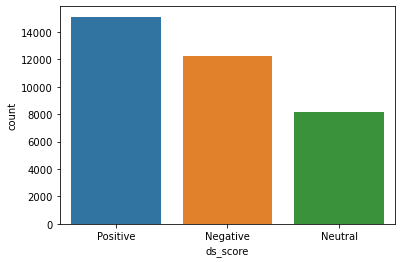

In [90]:
# plot a count plot on description score column
sns.countplot(x='ds_score',data=data_cn_r)

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [91]:
# pie chart on description score column
import plotly.express as px
fig=px.pie(data_cn_r,names='ds_score',title='pie chart of diff sentiments')
fig.show()

In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [92]:
# split the dataset  into test and train 
from sklearn.model_selection import train_test_split
# 90% train , 10% test and random state 212
X=data_cn_r.Description
y=data_cn_r['ds_score']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [93]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
# pipeline creation
from sklearn.pipeline import Pipeline
pipe=Pipeline([('tfid',TfidfVectorizer()),('model',LinearSVC())])
# 1. tfidVectorization
# 2. linearSVC model



# Fit the pipeline to the data
pipe.fit(X_train,y_train)
# predict on test dataset
y_pred=pipe.predict(X_test)
# print accuracy score
print(metrics.accuracy_score(y_test,y_pred))
#print confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))
#print classification report
print(metrics.classification_report(y_test,y_pred))

<IPython.core.display.Javascript object>

0.911768851303735


<IPython.core.display.Javascript object>

[[2124  120  141]
 [  81 1431   73]
 [ 133   78 2914]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      2385
     Neutral       0.88      0.90      0.89      1585
    Positive       0.93      0.93      0.93      3125

    accuracy                           0.91      7095
   macro avg       0.91      0.91      0.91      7095
weighted avg       0.91      0.91      0.91      7095

Wall time: 3.24 s


LOGISTIC REGRESSION


In [50]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# pipeline creation 
pipe2=Pipeline([('countV',CountVectorizer()),('Tfid',TfidfTransformer()),('LogR',LogisticRegression())])
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression


# fit the pipeline to the train data
pipe2.fit(X_train,y_train)

# predict on test dataset
pred2=pipe2.predict(X_test) 
#print accuracy
print(metrics.accuracy_score(y_test,pred2)) 

#print confusion matrix
print(metrics.confusion_matrix(y_test,pred2))
# print classification report
print(metrics.classification_report(y_test,pred2)) 

<IPython.core.display.Javascript object>

ValueError: Unknown label type: 'continuous'

MULTINOMIAL NAIVE BAYES


In [135]:
%%time
from sklearn.naive_bayes import MultinomialNB
# pipeline creation 
pipe3=Pipeline([('countV',CountVectorizer()),('Tfid',TfidfTransformer()),('Mnb',MultinomialNB())])
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
 

# fit the pipeline to the train data
pipe3.fit(X_train,y_train)
#predict on test data

pred3=pipe3.predict(X_test)
#print accuracy
print(metrics.accuracy_score(y_test,pred3)) 
#print confusion matrix
print(metrics.confusion_matrix(y_test,pred3))
# print classification report
print(metrics.classification_report(y_test,pred3)) 

<IPython.core.display.Javascript object>

0.6407329105003524


<IPython.core.display.Javascript object>

[[1519   29  837]
 [ 306  226 1053]
 [ 306   18 2801]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

    Negative       0.71      0.64      0.67      2385
     Neutral       0.83      0.14      0.24      1585
    Positive       0.60      0.90      0.72      3125

    accuracy                           0.64      7095
   macro avg       0.71      0.56      0.54      7095
weighted avg       0.69      0.64      0.60      7095

Wall time: 1.61 s


BERNOULLI NAIVE BAYES


In [138]:
%%time
from sklearn.naive_bayes import BernoulliNB
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB
pipe4=Pipeline([('countV',CountVectorizer()),('Tfid',TfidfTransformer()),('Bnb',BernoulliNB())])


# fit the pipeline to the train data
pipe4.fit(X_train,y_train)
#predict on test dataset
pred4=pipe4.predict(X_test)
#print accuracy
print(metrics.accuracy_score(y_test,pred4))
#print confusion matrix
print(metrics.confusion_matrix(y_test,pred4))

# print classification report
print(metrics.classification_report(y_test,pred4))

<IPython.core.display.Javascript object>

0.7223396758280479


<IPython.core.display.Javascript object>

[[1675  167  543]
 [ 257  965  363]
 [ 469  171 2485]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

    Negative       0.70      0.70      0.70      2385
     Neutral       0.74      0.61      0.67      1585
    Positive       0.73      0.80      0.76      3125

    accuracy                           0.72      7095
   macro avg       0.72      0.70      0.71      7095
weighted avg       0.72      0.72      0.72      7095

Wall time: 1.61 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [152]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
# pipeline creation 
pipe5=Pipeline([('countV',CountVectorizer()),('Tfid',TfidfTransformer()),('Gbc',GradientBoostingClassifier())])
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

# Fit the pipeline to the data
pipe5.fit(X_train,y_train)

# predict on test data
pred5=pipe5.predict(X_test)

#print accuracy
print(metrics.accuracy_score(y_test,pred5))

#print confusion matrix
print(metrics.confusion_matrix(y_test,pred5))

# print classification report
print(metrics.classification_report(y_test,pred5))

<IPython.core.display.Javascript object>

0.8211416490486257


<IPython.core.display.Javascript object>

[[1664  375  346]
 [  46 1500   39]
 [ 152  311 2662]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

    Negative       0.89      0.70      0.78      2385
     Neutral       0.69      0.95      0.80      1585
    Positive       0.87      0.85      0.86      3125

    accuracy                           0.82      7095
   macro avg       0.82      0.83      0.81      7095
weighted avg       0.84      0.82      0.82      7095

Wall time: 2min 14s


XGBOOST CLASSIFICATION MODEL


In [248]:
%%time
from xgboost import XGBClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe6=Pipeline([('countV',CountVectorizer()),('Tfid',TfidfTransformer()),('Xgb',XGBClassifier())])

# Fit the pipeline to the data
pipe6.fit(X_train,y_train)
# predict on test data
pred6=pipe.predict(X_test)
#print accuracy
print(metrics.accuracy_score(y_test,pred6))
#print confusion matrix
print(metrics.confusion_matrix(y_test,pred6))
# print classification report
print(metrics.classification_report(y_test,pred6))

XGBOOST
accuracy: 57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
     Postive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 10.6 s, sys: 91.3 ms, total: 10.7 s
Wall time: 10.7 s


DECISION TREE CLASSIFICATION MODEL


In [153]:
%%time
from sklearn.tree import DecisionTreeClassifier
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe7=Pipeline([('countV',CountVectorizer()),('Tfid',TfidfTransformer()),('dtree',DecisionTreeClassifier())])
pipe7.fit(X_train,y_train)

# Fit the pipeline to the data
pred7=pipe7.predict(X_test)
# predict on test data

#print accuracy
print(metrics.accuracy_score(y_test,pred7))
#print confusion matrix
print(metrics.confusion_matrix(y_test,pred7))
# print classification report
print(metrics.classification_report(y_test,pred7))





<IPython.core.display.Javascript object>

0.859337561663143


<IPython.core.display.Javascript object>

[[1919   64  402]
 [  55 1488   42]
 [ 392   43 2690]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

    Negative       0.81      0.80      0.81      2385
     Neutral       0.93      0.94      0.94      1585
    Positive       0.86      0.86      0.86      3125

    accuracy                           0.86      7095
   macro avg       0.87      0.87      0.87      7095
weighted avg       0.86      0.86      0.86      7095

Wall time: 26.2 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [154]:
%%time
from sklearn.neighbors import KNeighborsClassifier
pipe8=Pipeline([('countV',CountVectorizer()),('Tfid',TfidfTransformer()),('Knn',KNeighborsClassifier())])
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pipe8.fit(X_train,y_train)
pred8=pipe8.predict(X_test)


# Fit the pipeline to the data

print(metrics.accuracy_score(y_test,pred8))
#print confusion matrix
print(metrics.confusion_matrix(y_test,pred8))
# print classification report
print(metrics.classification_report(y_test,pred8))


<IPython.core.display.Javascript object>

0.5353065539112051


<IPython.core.display.Javascript object>

[[1473  349  563]
 [ 486  611  488]
 [ 865  546 1714]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

    Negative       0.52      0.62      0.57      2385
     Neutral       0.41      0.39      0.40      1585
    Positive       0.62      0.55      0.58      3125

    accuracy                           0.54      7095
   macro avg       0.52      0.52      0.51      7095
weighted avg       0.54      0.54      0.53      7095

Wall time: 2min 31s


In [251]:
# helper function for comparing models matric

    # the libraries we need
    

    # create a dataframe with column matric and metric name as value
   
   
    # then predict on the test set
    

In [252]:
# list of model objects

# list of model names

# print the comparison of models


linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
     Postive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

---------------------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
     Postive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.88      0.24      0.37      1224
     Neutral       0.00      0.00      0.00       816
     Postive       0.46      0.98      0.62      1507

    accuracy                           0.50      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.50      0.50      0.39      3547

---------------------------------------------------------------------------------------
decisiontree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.41      0.89      0.56      1224
     Neutral       0.00      0.00      0.00       816
     Postive       0.84      0.48      0.61      1507

    accuracy                           0.51      3547
   macro avg       0.41      0.46      0.39      3547
weighted avg       0.50      0.51      0.45      3547

---------------------------------------------------------------------------------------
K

# working with test dataset

In [253]:
# Perforn the prediction on the test dataset


array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Postive',
       'Neutral'], dtype=object)

In [254]:
# creating a dataframe of predicted results 


,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Postive


# Now working with headlines + description

In [257]:
# merge headlines and description of new dataset and name it info


,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Postive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Postive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Postive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative,Wall Street delivered the 'kind of pullback I'...


In [258]:
# only keep info and time column . drop all remaining columns


,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [259]:
# apply preprocessing on info column
 

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
5,"7:23 PM ET Thu, 16 July 2020",cramer lightn round would stay long wexmad mon...
6,"8:03 PM ET Thu, 16 July 2020",acorn ceo parent turn 5 five figur kid power c...
7,"8:54 AM ET Thu, 16 July 2020",dividend cut may mean rethink retir incom stra...
8,"8:25 PM ET Wed, 15 July 2020",stockx authent 1 million jordan sneaker year c...
9,"7:51 PM ET Wed, 15 July 2020",biohaven pharmaceut land khloe kardashian infl...


In [260]:
# analyze polarity score of values in info and  add new column of it in dataset


,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2263
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,-0.2732
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,-0.3818


In [261]:
# apply the function  which decides sentiment to  polarity score column


,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,Postive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,Postive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Postive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


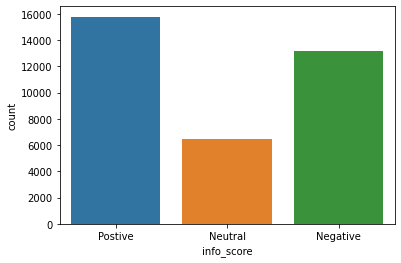

In [262]:
# perform count plot on info_score column


In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [263]:
# perform pie chart on info_score column


In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [264]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212


LINEAR SUPPORT VECTOR MACHINE


In [265]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipline to the data

#predict on test dataset


#print accuracy

#print confusion matrix

# print classification report


MODEL - LINEAR SVC
accuracy score: 90.98%
[[1164   78   81]
 [  22  619   17]
 [  65   57 1444]]
              precision    recall  f1-score   support

    Negative       0.93      0.88      0.90      1323
     Neutral       0.82      0.94      0.88       658
     Postive       0.94      0.92      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.91      0.90      3547
weighted avg       0.91      0.91      0.91      3547

CPU times: user 2.1 s, sys: 72.2 ms, total: 2.18 s
Wall time: 2.18 s


LOGISTIC REGRESSION


In [266]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression



# Fit the pipeline to the data

#predict on test data


#print accuracy

#print confusion matrix
 
# print classification report
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 14 s, sys: 9.41 s, total: 23.4 s
Wall time: 14.8 s


MULTINOMIAL NAIVE BAYES


In [267]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


# Fit the pipeline to the data
 
#predict on test data
  
#print accuracy
 
#print confusion matrix
 
# print classification report
 

MULTINOMIAL NAIVE BAYES
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 5.67 s, sys: 57.6 ms, total: 5.72 s
Wall time: 5.74 s


BERNOULLI NAIVE BAYES


In [268]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

# Fit the pipeline to the data
 
#predict on test data
 
#print accuracy
 
#print confusion matrix
 
# print classification report
 

BERNOULLIS NAIVE BAYES
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 5.64 s, sys: 90 ms, total: 5.73 s
Wall time: 5.73 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [270]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier



# Fit the pipeline to the data
 
# predict on test data
 
#print accuracy
 
#print confusion matrix
 
# print classification report
 

GRADIENT BOOST
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 24 s, sys: 338 ms, total: 24.4 s
Wall time: 24.3 s


XGBOOST CLASSIFICATION MODEL


In [271]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


XGBOOST
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 13 s, sys: 106 ms, total: 13.1 s
Wall time: 13 s


DECISION TREE CLASSIFICATION MODEL


In [272]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier



# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


DECISION TREE
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 8.16 s, sys: 33.7 ms, total: 8.2 s
Wall time: 8.21 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [273]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier


# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


K NEAREST NEIGHBOR
accuracy: 56.16%
[[ 686  183  454]
 [ 156  245  257]
 [ 303  202 1061]]
              precision    recall  f1-score   support

    Negative       0.60      0.52      0.56      1323
     Neutral       0.39      0.37      0.38       658
     Postive       0.60      0.68      0.64      1566

    accuracy                           0.56      3547
   macro avg       0.53      0.52      0.52      3547
weighted avg       0.56      0.56      0.56      3547

CPU times: user 5.16 s, sys: 31.1 ms, total: 5.19 s
Wall time: 5.21 s


In [274]:
# helper function for comparing models matric

    # the libraries we need

    # create a dataframe with column matric and metric name as value

    # then predict on the test set
   
    

In [276]:
# list of model objects

# list of model names

# print the comparison of models


linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.75      0.83      1323
     Neutral       0.47      0.99      0.63       658
     Postive       0.96      0.66      0.78      1566

    accuracy                           0.76      3547
   macro avg       0.78      0.80      0.75      3547
weighted avg       0.85      0.76      0.77      3547

---------------------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.91      0.66      0.76      1323
     Neutral       0.39      0.99      0.56       658
     Postive       0.96      0.56      0.71      1566

    accuracy                           0.68      3547
   macro avg       0.75      0.74      0.68      3547
weighted avg       0.83      0.68      0.70      3547

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.77      0.26      0.39      1323
     Neutral       0.25      0.99      0.41       658
     Postive       0.81      0.28      0.42      1566

    accuracy                           0.40      3547
   macro avg       0.61      0.51      0.40      3547
weighted avg       0.69      0.40      0.40      3547

---------------------------------------------------------------------------------------
decisiontree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.77      0.21      0.33      1323
     Neutral       0.25      0.99      0.40       658
     Postive       0.81      0.29      0.42      1566

    accuracy                           0.39      3547
   macro avg       0.61      0.49      0.38      3547
weighted avg       0.69      0.39      0.38      3547

---------------------------------------------------------------------------------------
K

# working with test data

In [279]:
# Perforn the prediction on the test dataset


array(['Negative', 'Negative', 'Negative', ..., 'Neutral', 'Postive',
       'Postive'], dtype=object)

In [280]:
# creating a dataframe of predicted results 


,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Postive


# now working on headlines

In [283]:
# from the dataset you have copied before delete the column of description


,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"


In [285]:
# remane the date column in gaurdian headlines dataset  to time


,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [286]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together


,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [288]:
# check the shape of all headlines dataset


(53258, 2)

In [289]:
#apply preprocessin to the headlines column in the new dataset
 

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...


In [290]:
# analyze polarity score of values in headlines and  add new column of it in dataset



,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,-0.8860
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,-0.4939
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,0.0000
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,0.0000


In [291]:
# apply the function  which decides sentiment to  polarity score column


,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,Neutral
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Neutral


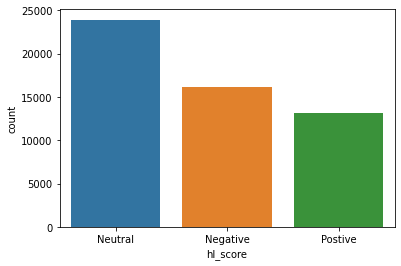

In [292]:
#perform countplot on headline score column



In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [293]:
#perform pie digram on headline score column



In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [294]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212



LINEAR SUPPORT VECTOR MACHINE

In [295]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipeline to the data

# predict on test dataset

#print accuracy

#print confusion matrix

# print classification report


MODEL - LINEAR SVC
accuracy score: 93.11%
[[1572   37   40]
 [ 111 2106  109]
 [  49   21 1281]]
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93      1649
     Neutral       0.97      0.91      0.94      2326
     Postive       0.90      0.95      0.92      1351

    accuracy                           0.93      5326
   macro avg       0.93      0.94      0.93      5326
weighted avg       0.93      0.93      0.93      5326

CPU times: user 1.69 s, sys: 79.7 ms, total: 1.77 s
Wall time: 1.77 s


LOGISTIC REGRESSION

In [296]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression



# Fit the pipeline to the data

# predict on test dataset


#print accuracy

#print confusion matrix

# print classification report


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 11.6 s, sys: 6.95 s, total: 18.5 s
Wall time: 12.3 s


MULTINOMIAL NAIVE BAYES


In [297]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


# Fit the pipeline to the data

#predict on test data

#print accuracy

#print confusion matrix

# print classification report


MULTINOMIAL NAIVE BAYES
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 5.38 s, sys: 100 ms, total: 5.49 s
Wall time: 5.47 s


BERNOULLI NAIVE BAYES


In [298]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB


# fit the pipeline to the train data

#predict on test dataset


#print accuracy


#print confusion matrix

# print classification report



BERNOULLIS NAIVE BAYES
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 5.38 s, sys: 93.5 ms, total: 5.48 s
Wall time: 5.44 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [299]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier



# Fit the pipeline to the data


# predict on test data


#print accuracy

#print confusion matrix

# print classification report


GRADIENT BOOST
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 14.1 s, sys: 952 ms, total: 15 s
Wall time: 15 s


XGBOOST CLASSIFICATION MODEL


In [300]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the model to the data


# predict on test data


#print accuracy

#print confusion matrix

# print classification report


XGBOOST
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 8.94 s, sys: 72.1 ms, total: 9.01 s
Wall time: 8.96 s


DECISION TREE CLASSIFICATION MODEL


In [301]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier



# Fit the pipeline to the data

# predict on test data

#print accuracy

#print confusion matrix

# print classification report


DECISION TREE
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 6.49 s, sys: 65.3 ms, total: 6.55 s
Wall time: 6.54 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [302]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier


# Fit the pipeline to the data


# prect on test data


#print accuracy


#print confusion matrix


# print classification report



K NEAREST NEIGHBOR
accuracy: 49.85%
[[1047  150  452]
 [ 608  648 1070]
 [ 233  158  960]]
              precision    recall  f1-score   support

    Negative       0.55      0.63      0.59      1649
     Neutral       0.68      0.28      0.39      2326
     Postive       0.39      0.71      0.50      1351

    accuracy                           0.50      5326
   macro avg       0.54      0.54      0.50      5326
weighted avg       0.57      0.50      0.48      5326

CPU times: user 5.28 s, sys: 72.2 ms, total: 5.36 s
Wall time: 5.35 s


In [303]:
# helper function for comparing models matric

    # the libraries we need
   

    # create a dataframe with column matric and metric name as value
   
   
    # then predict on the test set
     

In [304]:
# list of model objects

# list of model names

# print the comparison of models


linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
     Postive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

---------------------------------------------------------------------------------------
logisitc
Classification Report 
               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
     Postive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
     Postive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

---------------------------------------------------------------------------------------
XGB
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.27      0.42      1649
     Neutral       0.53      1.00      0.69      2326
     Postive       0.87      0.30      0.45      1351

    accuracy                           0.60      5326
   macro avg       0.78      0.52      0.52      5326
weighted avg       0.74      0.60      0.55      5326

---------------------------------------------------------------------------------------
decisiontr

# now working with test data

In [306]:
# Perforn the prediction on the test dataset


array(['Postive', 'Negative', 'Neutral', ..., 'Neutral', 'Postive',
       'Postive'], dtype=object)

In [307]:
# creating a dataframe of predicted results 


,0
0,Postive
1,Negative
2,Neutral
3,Negative
4,Neutral


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [309]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_hl.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [1]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = pipe.predict(sent1)
y_predict

NameError: name 'pipe' is not defined

In [310]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_hl.predict(sent2)
y_predict

array(['Postive'], dtype=object)

In [94]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate


#Congratulation for completing the assignment.


You have learned a lot while doing this assignment.